<a href="https://colab.research.google.com/github/wingated/cs474_labs_f2019/blob/master/DL_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Intro to PyTorch

## Deliverable

For this lab, you will submit an ipython notebook via learningsuite.
This lab will be mostly boilerplate code, but you will be required to implement a few extras.

**NOTE: you almost certainly will not understand most of what's going on in this lab!
That's ok - the point is just to get you going with pytorch.
We'll be working on developing a deeper understanding of every part of this code
over the course of the next two weeks.**

A major goal of this lab is to help you become conversant in working through pytorch
tutorials and documentation.
So, you should feel free to google whatever you want and need!

This notebook will have three parts:

* Part 1: Your notebook should contain the boilerplate code. See below.

* Part 2: Your notebook should extend the boilerplate code by adding a testing loop.

* Part 3: Your notebook should extend the boilerplate code by adding a visualization of test/training performance over time.

The resulting image could, for example, look like this:
![](http://liftothers.org/dokuwiki/lib/exe/fetch.php?cache=&w=900&h=608&tok=3092fe&media=cs501r_f2018:lab2.png)
See the assigned readings for pointers to documentation on pytorch.
___

### Grading standards:
Your notebook will be graded on the following:

* 50% Successfully followed lab video and typed in code
* 20% Modified code to include a test/train split
* 20% Modified code to include a visualization of train/test losses
* 10% Tidy and legible figures, including labeled axes where appropriate
___

### Description
Throughout this class, we will be using pytorch to implement our deep neural networks. 
Pytorch is a deep learning framework that handles the low-level details of 
GPU integration and automatic differentiation.

The goal of this lab is to help you become familiar with pytorch. 
The three parts of the lab are outlined above.

For part 1, you should watch the video below, and type in the code as it is explained to you.

A more detailed outline of Part 1 is below.

For part 2, you must add a validation (or testing) loop using the 
FashionMNIST dataset with train=False

For part 3, you must plot the loss values and demonstrate overfitting.

The easiest way to do this is to limit the size of your training dataset 
so that it only returns a single batch (ie len(dataloader) == batch_size, 
and train for multiple epochs. In the example graph above, 
I set my batch size to 42, and augmented my dataloader to produce only 42 
unique items by overwriting the len function to return 42. 
In my training loop, I performed a validation every epoch which basically corresponded 
to a validation every step.

In practice, you will normally compute your validation loss every n steps, 
rather than at the end of every epoch. This is because some epochs can take hours, 
or even days and you don’t often want to wait that long to see your results.

Testing your algorithm by using a single batch and training until overfitting 
is a great way of making sure that your model and optimizer are working the way they should!

___

### Part 0
Watch Tutorial Video

[https://youtu.be/0P-YctShbwc](https://youtu.be/0P-YctShbwc)

**TODO:**
* Watch video

**DONE:**

___

### Part 1
Your notebook should contain the boilerplate code. See below.

**TODO:**

* Replicate boilerplate from the video

**DONE:**

___

### Part 2
Your notebook should extend the boilerplate code by adding a testing loop.

**TODO:**

* Add a testing (validation) loop

**DONE:**

In [1]:
!pip3 install torch 
!pip3 install torchvision
!pip3 install tqdm

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, utils, datasets
from tqdm import tqdm
 
assert torch.cuda.is_available() # You need to request a GPU from Runtime > Change Runtime Type

# Write the boilerplate code from the video here

# Create a dataset class that extends the torch.utils.data Dataset class here

# Extend the torch.Module class to create your own neural network

# Instantiate the train and validation sets

# Instantiate your data loaders

# Instantiate your model and loss and optimizer functions

# Run your training / validation loops


In [3]:
ds = datasets.FashionMNIST('/tmp/fashionmnist', train = True,
                                           transform=transforms.ToTensor(),
                                           download=True)

0it [00:00, ?it/s]

26427392it [00:02, 10313882.85it/s]                             


Extracting /tmp/fashionmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 71979.91it/s]                            
0it [00:00, ?it/s]

Extracting /tmp/fashionmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 3059802.81it/s]                            
0it [00:00, ?it/s]

Extracting /tmp/fashionmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 23949.76it/s]            

Extracting /tmp/fashionmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


loss:1.989900: 100%|██████████| 4000/4000 [01:13<00:00, 54.28it/s]


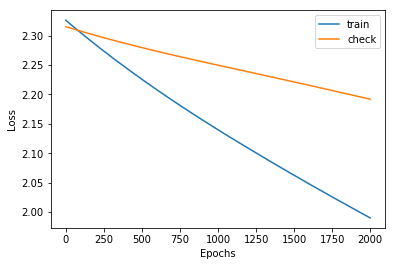

In [27]:
# define the numbers for this particular dataset and this particular setup

in_dim = 784    # because the dataset is 28x28 (=728) images with only one channel
                # -- note that I put 728 because I will flatten out the images
                # before putting them in

out_dim = 10    # we want to classify each image as one of 10 things!

num_epochs = 2000  # this is the number of times we want to run through 
                # the network on the training set
  
one_batch_size = 50  # this is the number of items that will be processed in one
                     # run; the number of items that will influence a single 
                     # step down the gradient

dataset_size = 100 # this is the size of the total datasets for the purpose of
                   # trying to overfit
  
  
  
  
class LinearNetwork(nn.Module):
  '''Define the Linear Network to classify the FashionMNIST dataset'''
  
  def __init__(self, dataset):             # each network defined must contain
                                           # an __init__() function and a forward()
                                           # function.
    super(LinearNetwork, self).__init__()  
    x, y = dataset[0]
    c, h, w = x.size()                     # c, h, w = channels, height, width
                                           # The following line defines the architecture
                                           # of this particular network
    self.net = nn.Sequential(nn.Linear(in_dim, 500),
                             nn.ReLU(),
#                              nn.Linear(500,100),
#                              nn.ReLU(),
                             nn.Linear(500, out_dim)
                            )  
    
  def forward(self, x):                    # the forward function serves to tell
                                           # the network how to actually construct
                                           # the layers of the net, and in which
                                           # order and manner to backpropogate
    n, c, h, w = x.size()
    flattened = x.view(n, c * h * w)  
    return self.net(flattened)
  
  
  
class Train_FashionMNISTProcessedDataset(Dataset):
  '''Define the training Dataset'''
  def __init__(self, root, train=True):    # note that train is True on the training set
    
    self.data = datasets.FashionMNIST(root, train = train,
                                           transform=transforms.ToTensor(),
                                           download=True)

                            # each dataset must have a __getitem__
                            # and a __len__ method
  def __getitem__(self, i):             
    x,y = self.data[i]
    return x, y

  def __len__(self):
    return dataset_size # typically, I would put len(self.data) here, but I want
                        # to overfit to fill the requirement of the assignment
  
  
  
  
class Check_FashionMNISTProcessedDataset(Dataset):
  '''Define the check Dataset (also called the testing dataset, but calling it 
     check adds for use of the variables 'c' and 't' for future reference)'''
  def __init__(self, root, train=False):    # note that train is False on the validation set
    
    self.data = datasets.FashionMNIST(root, train = train,
                                           transform=transforms.ToTensor(),
                                           download=True)

                            # each dataset must have a __getitem__
                            # and a __len__ method
  def __getitem__(self, i):             
    x,y = self.data[i]
    return x, y

  def __len__(self):
    return dataset_size # typically, I would put len(self.data) here, but I want
                        # to overfit to fill the requirement of the assignment
  
    
    
  # With the classes established, I create instances of my training and checking
  # datasets, along with the model (the network created above).  
    
train_dataset = Train_FashionMNISTProcessedDataset('/tmp/fashionmnist', train=True)
check_dataset = Check_FashionMNISTProcessedDataset('/tmp/fashionmnist', train=False)
model = LinearNetwork(train_dataset)
model = model.cuda()   # we add model to the GPU here

  # also establish the objective (or loss) function here, as well as the optimizer
objective = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 1e-4)

                       # the train loader and check loader allow for access to the
                       # items in their respective dataset; they allow them to be
                       # processed together one batch at a time.
                                     
train_loader = DataLoader(train_dataset,
                         batch_size = one_batch_size,
                         pin_memory = True)
check_loader = DataLoader(check_dataset,
                         batch_size = one_batch_size,
                         pin_memory = True)

  # these train_looses and check_losses arrays will fill up with the loss values
train_losses = []
check_losses = []


# the tqdm shows the information as you train
loop = tqdm(total=len(train_loader) * num_epochs, position=0)

for epoch in range(num_epochs): # runs num_epochs number of times: each epoch runs
                                # through one batch of data
  
  # ---training loop start
  for i, (x, y_truth) in enumerate(train_loader): # each loop here steps through one batch
    x, y_truth = x.cuda(async=True), y_truth.cuda(async=True) #async=True speeds it up

    # forget about the gradients from before
    optimizer.zero_grad()

    y_hat = model(x)
    train_loss = objective(y_hat, y_truth) # this is a way 
        
    # display the information as you train
    loop.set_description('loss:{:4f}'.format(train_loss.item()))
    loop.update(1)

    train_loss.backward()

    optimizer.step()
  # ---training loop ends  
    
  # ---checking loop start  
  for i, (x, y_truth) in enumerate(check_loader): # each loop here steps through one batch
    x, y_truth = x.cuda(async=True), y_truth.cuda(async=True) #async=True speeds it up
    y_hat = model(x)
    check_loss = objective(y_hat, y_truth)
  # ---checking loop ends
  
  train_losses.append(train_loss.item())
  check_losses.append(check_loss.item())
  
loop.close()


#  Plot the resulting loss curves
plt.plot(train_losses, label = "train")
plt.plot(check_losses, label = "check")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


___

### Part 3
Your notebook should extend the boilerplate code by adding a visualization of test/training
performance over time. Use matplotlib.pyplot

**TODO:**

**DONE:**
* Add a visualization of test/train performance (i.e. loss) over time.

**SEE ABOVE**
